In [44]:
import numpy as np
import pandas as pd
import os

In [2]:
base_dir = "/Users/teliov/TUD/Thesis/Medvice/Notebooks/data/07_27_reports/eval-runs"
fig_dir = os.path.join(base_dir, "figures")
table_dir = os.path.join(base_dir, "tables")

In [3]:
from glob import glob

In [4]:
filenames = sorted(glob(os.path.join(base_dir, "*.csv")))

In [5]:
dirmaps = [
    "output_basic_15k",
    "output_basic_2_cnt_15k",
    "output_basic_3_cnt_15k",
    "output_basic_4_cnt_15k",
    "output_basic_avg_cnt_15k",
    "output_basic_inc_1_15k",
    "output_basic_inc_2_15k",
    "output_basic_inc_3_15k",
    "output_basic_pct_10_15k",
    "output_basic_pct_20_15k",
    "output_basic_pct_30_15k",
    "output_basic_pct_50_15k",
    "output_basic_pct_70_15k",
]

In [6]:
nicknames = [
    "Baseline",
    "Min. 2 Symptoms",
    "Min. 3 Symptoms",
    "Min. 4 Symptoms",
    "Min. 5 Symptoms",
    "Mean Injected",
    "Max Injected",
    "Min Injected",
    "Perturbed-10%",
    "Perturbed-20%",
    "Perturbed-30%",
    "Perturbed-50%",
    "Perturbed-70%"
]

In [7]:
nicknames_map = {dirmaps[idx]: nickname for idx, nickname in enumerate(nicknames)}

In [8]:
dfs = [pd.read_csv(filename) for filename in filenames]

In [9]:
# construct table for baseline vs special models
headers = ["dataset", "baseline_acc", "data_acc", "baseline_prec", "data_prec", "baseline_top5", "data_top5"]
nb_vs_all = {item: [] for item in headers}
rf_vs_all = {item: [] for item in headers}

In [10]:
for idx, df in enumerate(dfs):
    rf_values = df[df['model'] == "random_forest"].mean()
    nb_values = df[df['model'] == 'naive_bayes'].mean()
    if idx == 0:
        # baseline
        for dirname in dirmaps:
            acc_score = "%s_accuracy_score" % dirname
            prec_score = "%s_precision_weighted_score" % dirname
            top5_score = "%s_top_5_score" % dirname
            nb_vs_all["baseline_acc"].append(nb_values[acc_score])
            nb_vs_all["baseline_prec"].append(nb_values[prec_score])
            nb_vs_all["baseline_top5"].append(nb_values[top5_score])
            rf_vs_all["baseline_acc"].append(rf_values[acc_score])
            rf_vs_all["baseline_prec"].append(rf_values[prec_score])
            rf_vs_all["baseline_top5"].append(rf_values[top5_score])

    dirname = dirmaps[idx]
    acc_score = "%s_accuracy_score" % dirname
    prec_score = "%s_precision_weighted_score" % dirname
    top5_score = "%s_top_5_score" % dirname
    
    nb_vs_all["data_acc"].append(nb_values[acc_score])
    nb_vs_all["data_prec"].append(nb_values[prec_score])
    nb_vs_all["data_top5"].append(nb_values[top5_score])
    rf_vs_all["data_acc"].append(rf_values[acc_score])
    rf_vs_all["data_prec"].append(rf_values[prec_score])
    rf_vs_all["data_top5"].append(rf_values[top5_score])
    
    nb_vs_all["dataset"].append(nicknames[idx])
    rf_vs_all["dataset"].append(nicknames[idx])
            

In [11]:
nb_df = pd.DataFrame(nb_vs_all)
rf_df = pd.DataFrame(rf_vs_all)

In [65]:
nb_perturbed = nb_df.iloc[[0, 8, 9, 10, 11, 12]][['dataset','baseline_acc', 'baseline_prec', 'baseline_top5']]
rf_perturbed = rf_df.iloc[[0, 8, 9, 10, 11, 12]][['dataset','baseline_acc', 'baseline_prec', 'baseline_top5']]

nb_new_columns = {val: "nb_{}".format(val) for val in nb_perturbed.columns}
rf_new_columns = {val: "rf_{}".format(val) for val in rf_perturbed.columns}

nb_perturbed = nb_perturbed.rename(columns=nb_new_columns)
rf_perturbed = rf_perturbed.rename(columns=rf_new_columns)

In [71]:
relevant_columns = []
for key in nb_new_columns.keys():
    relevant_columns.append(nb_new_columns[key])
    relevant_columns.append(rf_new_columns[key])

# drop the duplicate `dataset` column
relevant_columns = relevant_columns[1:]

In [72]:
perturbed = pd.concat([nb_perturbed, rf_perturbed],axis=1)
perturbed = perturbed[relevant_columns]

In [74]:
perturbed.to_csv(os.path.join(table_dir, "paper_perturbed_res.csv"), float_format="%.3f", index=False)

In [80]:
nb_injected = nb_df.iloc[[0, 7, 5, 6]][['dataset','baseline_acc', 'baseline_prec', 'baseline_top5']]
rf_injected = rf_df.iloc[[0, 7, 5, 6]][['dataset','baseline_acc', 'baseline_prec', 'baseline_top5']]

nb_injected = nb_injected.rename(columns=nb_new_columns)
rf_injected = rf_injected.rename(columns=rf_new_columns)

injected = pd.concat([nb_injected, rf_injected],axis=1)
injected = injected[relevant_columns]

In [82]:
injected.to_csv(os.path.join(table_dir, "paper_injected_res.csv"), float_format="%.3f", index=False)

In [83]:
injected

,rf_dataset,nb_baseline_acc,rf_baseline_acc,nb_baseline_prec,rf_baseline_prec,nb_baseline_top5,rf_baseline_top5
0,Baseline,0.587808,0.570958,0.633040,0.611600,0.852950,0.845333
7,Min Injected,0.480018,0.451291,0.514897,0.477554,0.753518,0.742924
5,Mean Injected,0.312353,0.285880,0.379986,0.339699,0.563293,0.559795
6,Max Injected,0.099380,0.099521,0.206609,0.177465,0.233775,0.270916


In [31]:
nb_baseline = nb_df.iloc[0][['baseline_acc', 'baseline_prec', 'baseline_top5']]
rf_baseline = rf_df.iloc[0][['baseline_acc', 'baseline_prec', 'baseline_top5']]

In [39]:
baseline_ = pd.DataFrame([nb_baseline, rf_baseline])
baseline_['Model'] = ['Naive Bayes', 'Random Forest']
baseline_ = baseline_[['Model', 'baseline_acc', 'baseline_prec', 'baseline_top5']]

In [43]:
baseline_.to_csv(os.path.join(table_dir, "paper_baseline_res.csv"), float_format="%.3f", index=False)

In [17]:
import matplotlib.pyplot as plt

In [16]:
# let's get the effect of increasing symptoms on metrics
nb_df_inc = nb_df.iloc[0:5]
rf_df_inc = rf_df.iloc[0:5]

In [20]:
fig_dir = "/Users/teliov/TUD/Thesis/Medvice/Reports/Differential Diagnosis A Machine Learning Approach/images/chapter-5/misc"

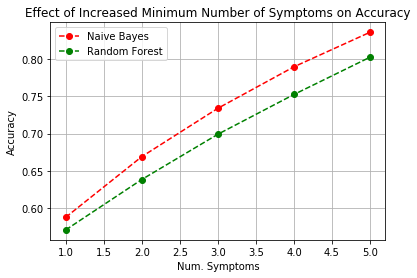

In [25]:
# plot accuracy for random forest and nb
fig, ax = plt.subplots()
ax.grid()
ax.plot(range(1, 6), nb_df_inc['baseline_acc'], 'o--', color="r", label="Naive Bayes")
ax.plot(range(1, 6), rf_df_inc['baseline_acc'], 'o--', color="g", label="Random Forest")
ax.set_xlabel("Num. Symptoms")
ax.set_ylabel("Accuracy")
ax.set_title("Effect of Increased Minimum Number of Symptoms on Accuracy")
ax.legend(loc='best')
fig.savefig(os.path.join(fig_dir, "inc_symptoms_acc.pdf"))
fig.savefig(os.path.join(fig_dir, "inc_symptoms_acc.png"))

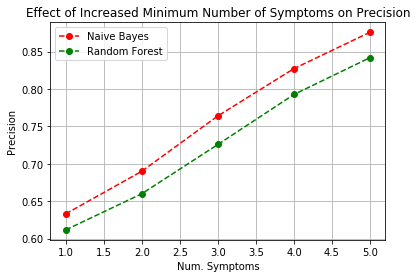

In [26]:
# plot precision for random forest and nb
fig, ax = plt.subplots()
ax.grid()
ax.plot(range(1, 6), nb_df_inc['baseline_prec'], 'o--', color="r", label="Naive Bayes")
ax.plot(range(1, 6), rf_df_inc['baseline_prec'], 'o--', color="g", label="Random Forest")
ax.set_xlabel("Num. Symptoms")
ax.set_ylabel("Precision")
ax.set_title("Effect of Increased Minimum Number of Symptoms on Precision")
ax.legend(loc='best')
fig.savefig(os.path.join(fig_dir, "inc_symptoms_prec.pdf"))
fig.savefig(os.path.join(fig_dir, "inc_symptoms_prec.png"))

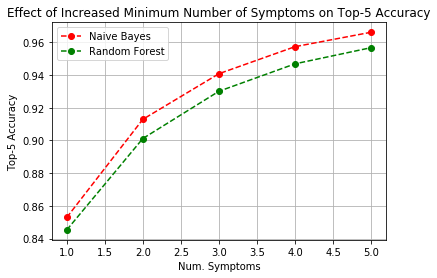

In [27]:
# plot top-5 for random forest and nb
fig, ax = plt.subplots()
ax.grid()
ax.plot(range(1, 6), nb_df_inc['baseline_top5'], 'o--', color="r", label="Naive Bayes")
ax.plot(range(1, 6), rf_df_inc['baseline_top5'], 'o--', color="g", label="Random Forest")
ax.set_xlabel("Num. Symptoms")
ax.set_ylabel("Top-5 Accuracy")
ax.set_title("Effect of Increased Minimum Number of Symptoms on Top-5 Accuracy")
ax.legend(loc='best')
fig.savefig(os.path.join(fig_dir, "inc_symptoms_top5.pdf"))
fig.savefig(os.path.join(fig_dir, "inc_symptoms_top5.png"))

In [15]:
nb_df_inc

,dataset,baseline_acc,data_acc,baseline_prec,data_prec,baseline_top5,data_top5
0,Baseline,0.587808,0.587808,0.633040,0.633040,0.852950,0.852950
1,Min. 2 Symptoms,0.669030,0.689758,0.689971,0.705702,0.912903,0.925067
2,Min. 3 Symptoms,0.733777,0.789414,0.763902,0.798259,0.940772,0.963534
3,Min. 4 Symptoms,0.789332,0.869031,0.827145,0.875745,0.957288,0.983287
4,Min. 5 Symptoms,0.835615,0.914194,0.875735,0.920664,0.966103,0.988644


In [32]:
nb_df.to_csv(os.path.join(table_dir, "nb_all.csv"), float_format="%.3f", index=False)
rf_df.to_csv(os.path.join(table_dir, "rf_all.csv"), float_format="%.3f", index=False)

In [84]:
# generate data for the augmented case!
augumented_csv = "/Users/teliov/TUD/Thesis/Medvice/Notebooks/data/07_27_reports/eval-runs/aug/augmented.csv"
ag_df = pd.read_csv(augumented_csv)

In [85]:
base_df = dfs[0]

In [86]:
headers = ["dataset", "baseline_acc", "aug_acc", "baseline_prec", "aug_prec", "baseline_top5", "aug_top5"]
nb_aug = {item: [] for item in headers}
rf_aug = {item: [] for item in headers}

In [87]:
for idx, dirname in enumerate(dirmaps):
    dataset = nicknames[idx]
    acc_score = "%s_accuracy_score" % dirname
    prec_score = "%s_precision_weighted_score" % dirname
    top5_score = "%s_top_5_score" % dirname
    
    rf_values = base_df[base_df['model'] == "random_forest"].mean()
    nb_values = base_df[base_df['model'] == 'naive_bayes'].mean()
    
    aug_rf_values = ag_df[ag_df['model'] == "random_forest"].mean()
    aug_nb_values = ag_df[ag_df['model'] == "naive_bayes"].mean()
    
    nb_aug["dataset"].append(dataset)
    rf_aug["dataset"].append(dataset)
    
    nb_aug["baseline_acc"].append(nb_values[acc_score])
    nb_aug["baseline_prec"].append(nb_values[prec_score])
    nb_aug["baseline_top5"].append(nb_values[top5_score])
    rf_aug["baseline_acc"].append(rf_values[acc_score])
    rf_aug["baseline_prec"].append(rf_values[prec_score])
    rf_aug["baseline_top5"].append(rf_values[top5_score])
    
    nb_aug["aug_acc"].append(aug_nb_values[acc_score])
    nb_aug["aug_prec"].append(aug_nb_values[prec_score])
    nb_aug["aug_top5"].append(aug_nb_values[top5_score])
    rf_aug["aug_acc"].append(aug_rf_values[acc_score])
    rf_aug["aug_prec"].append(aug_rf_values[prec_score])
    rf_aug["aug_top5"].append(aug_rf_values[top5_score])

In [88]:
nb_aug_df = pd.DataFrame(nb_aug)
rf_aug_df = pd.DataFrame(rf_aug)

In [90]:
nb_aug_injected = nb_aug_df.iloc[[0, 7, 5, 6]][['dataset','aug_acc', 'aug_prec', 'aug_top5']]
rf_aug_injected = rf_aug_df.iloc[[0, 7, 5, 6]][['dataset','aug_acc', 'aug_prec', 'aug_top5']]

nb_aug_new_columns = {val: "nb_{}".format(val) for val in nb_aug_injected.columns}
rf_aug_new_columns = {val: "rf_{}".format(val) for val in rf_aug_injected.columns}

nb_aug_injected = nb_aug_injected.rename(columns=nb_aug_new_columns)
rf_aug_injected = rf_aug_injected.rename(columns=rf_aug_new_columns)

aug_relevant_columns = []
for key in nb_aug_new_columns.keys():
    aug_relevant_columns.append(nb_aug_new_columns[key])
    aug_relevant_columns.append(rf_aug_new_columns[key])

# drop the duplicate `dataset` column
aug_relevant_columns = aug_relevant_columns[1:]

aug_injected = pd.concat([nb_aug_injected, rf_aug_injected],axis=1)
aug_injected = aug_injected[aug_relevant_columns]

In [92]:
aug_injected.to_csv(os.path.join(table_dir, "paper_aug_res.csv"), float_format="%.3f", index=False)

In [45]:
nb_aug_df.to_csv(os.path.join(table_dir, "nb_aug.csv"), float_format="%.3f", index=False)
rf_aug_df.to_csv(os.path.join(table_dir, "rf_aug.csv"), float_format="%.3f", index=False)

In [46]:
import joblib

In [56]:
from scipy.stats import entropy

In [66]:
dist_file = "/Users/teliov/TUD/Thesis/Medvice/Notebooks/data/07_27_reports/eval-runs/kl.joblib"

In [67]:
dist = joblib.load(dist_file)

In [68]:
kl_dist = np.zeros((len(dirmaps), 801))

In [69]:
base = dist[0, :, :]
_base_nz_arr = []
for idx in range(801):
    _v = np.where(base[idx, :] > 0)[0]
    assert _v.shape[0] > 0, "data index is empty"
    _base_nz_arr.append(_v)

In [73]:
for idx in range(13):
    data = dist[idx, :, :]
    for jdx in range(801):
        _data_nz = np.where(data[jdx, :] > 0)[0]
        _base_nz = _base_nz_arr[jdx]
        
        assert _data_nz.shape[0] > 0, "data index is empty"
        assert _data_nz.shape[0] >= _base_nz.shape[0], "%d, %d has fewer non-zero values than base" % (idx, jdx)
        
        # base should be a subset
        diff = np.setdiff1d(_base_nz, _data_nz, assume_unique=True)
        assert diff.shape[0] == 0, "%d, %d, does not match base" % (idx, jdx)
        
        kl_dist[idx, jdx] = entropy(base[jdx, :][_data_nz], data[jdx, :][_data_nz])
        

In [77]:
avg = np.mean(kl_dist, axis=1)

In [78]:
import matplotlib.pyplot as plt

In [92]:
avg_aligned = avg[[0, 1, 2, 3, 4, 10, 11, 12, 5, 6, 7, 8, 9]]

In [93]:
avg_aligned.shape

(13,)

<BarContainer object of 13 artists>

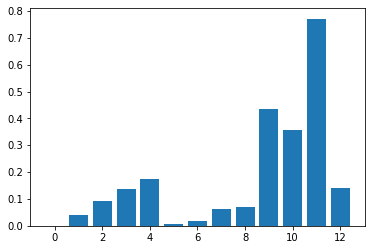

In [94]:
plt.bar(range(13), avg)

<BarContainer object of 13 artists>

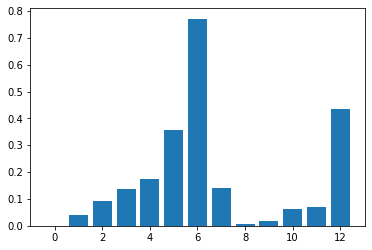

In [95]:
plt.bar(range(13), avg_aligned)

In [80]:
TARGET_DIRS=[
    "output_basic_15k",
    "output_basic_2_cnt_15k",
    "output_basic_3_cnt_15k",
    "output_basic_4_cnt_15k",
    "output_basic_avg_cnt_15k",
    "output_basic_pct_10_15k",
    "output_basic_pct_20_15k",
    "output_basic_pct_30_15k",
    "output_basic_pct_50_15k",
    "output_basic_pct_70_15k",
    "output_basic_inc_1_15k",
    "output_basic_inc_2_15k",
    "output_basic_inc_3_15k"
]

In [82]:
nb_df.columns

Index(['dataset', 'baseline_acc', 'data_acc', 'baseline_prec', 'data_prec',
       'baseline_top5', 'data_top5'],
      dtype='object')

In [118]:
acc_diff = np.abs(nb_df['baseline_acc'] - nb_df['data_acc'])

In [119]:
pct_diff = acc_diff.values

In [120]:
_sort_idx = np.argsort(avg_aligned)

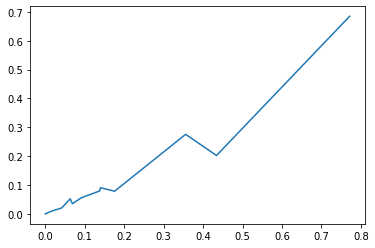

In [121]:
plt.plot(avg_aligned[_sort_idx], pct_diff[_sort_idx])

In [122]:
ll = np.zeros((13, 3))
ll[:, 0] = avg_aligned[_sort_idx]
ll[:, 1] = pct_diff[_sort_idx]
ll[:, 2] = np.array([0, 1, 2, 3, 4, 10, 11, 12, 5, 6, 7, 8, 9])[_sort_idx]

In [123]:
ll = pd.DataFrame(ll)

In [124]:
ll

,0,1,2
0,0.000000,0.000000,0.0
1,0.004971,0.003460,5.0
2,0.017816,0.010299,6.0
3,0.041683,0.020728,1.0
4,0.063005,0.052331,7.0
5,0.068871,0.035478,8.0
6,0.091069,0.055637,2.0
7,0.137980,0.079699,3.0
8,0.139644,0.090855,12.0
9,0.175650,0.078579,4.0


In [126]:
TARGET_DIRS[9]

'output_basic_pct_70_15k'